# MLG Labo8 - TSP

**Author:** Chris Barros Henriques
**Date:** 18.06.2021

Some functions were inspired from the example 12 from Pyevolve documentation but adapted:
http://pyevolve.sourceforge.net/examples.html

In [4]:
import geopy.distance
from pyevolve import G1DList
from pyevolve import GSimpleGA
from pyevolve import Selectors
from pyevolve import Statistics
from pyevolve import Consts
from pyevolve import Mutators
from pyevolve import DBAdapters
import random

In [5]:
def distance_between(p1, p2):
    return geopy.distance.distance(p1, p2).km

In [6]:
def vincenty_matrix(coords):
    matrix = {}
    for i, orig in enumerate(coords):
        for j, dest in enumerate(coords):
            matrix[i, j] = distance_between(orig, dest)
    return matrix

In [7]:
LAT = [16.47, 16.47, 20.09, 22.39, 25.23, 22.00, 20.47, 
          17.20, 16.30, 14.05, 16.53, 21.52, 19.41, 20.09]
LON = [96.10, 94.44, 92.54, 93.37, 97.24, 96.05, 97.02, 
          96.29, 97.38, 98.12, 97.38, 95.59, 97.13, 94.55]

cities = list(zip(LAT, LON))
NB_CITIES = len(cities)

global dist_matrix
dist_matrix = vincenty_matrix(cities)

In [16]:
def init(genome, **kwargs):
    genome.clearList()
    lst = [i for i in range(genome.getListSize())]
    random.shuffle(lst)

    for c in lst:
        genome.append(c)

In [17]:
def fitness(chromosome):
    global dist_matrix
    score = 0.0
    nb_cities = len(chromosome)
    for i in range(nb_cities):
        j = (i + 1) % nb_cities  
        score += dist_matrix[chromosome[i], chromosome[j]]
    return score

In [18]:
def current_best(ga_engine):
    # Here you have access to the GA Engine
    best = ga.bestIndividual()
    for i in range(0,len(best)):
        print(chr(best[i]))
    return False

In [15]:
# genome = List of elements
genome = G1DList.G1DList(NB_CITIES)

genome.evaluator.set(fitness)
genome.mutator.set(Mutators.G1DListMutatorSwap)
genome.initializator.set(init)

genome.setParams(rangemin=0, rangemax=NB_CITIES-1)

ga = GSimpleGA.GSimpleGA(genome)
ga.setCrossoverRate(0.9)
ga.setPopulationSize(300)
ga.setMutationRate(0.02)
ga.setGenerations(200)
ga.setMinimax(Consts.minimaxType['minimize'])
ga.setDBAdapter(DBAdapters.DBSQLite(identify="tsp"))

ga.evolve(freq_stats=10)

best = ga.bestIndividual()
print(best)

Gen. 0 (0.00%): Max/Min/Avg Fitness(Raw)             [8098.76(8726.21)/5440.55(4832.33)/6748.97(6748.97)]
Gen. 10 (5.00%): Max/Min/Avg Fitness(Raw)             [4372.81(7028.01)/3591.70(3401.13)/3644.01(3644.01)]
Gen. 20 (10.00%): Max/Min/Avg Fitness(Raw)             [4281.81(6181.52)/3507.71(3346.76)/3568.18(3568.18)]
Gen. 30 (15.00%): Max/Min/Avg Fitness(Raw)             [4240.07(5781.95)/3474.74(3346.76)/3533.39(3533.39)]
Gen. 40 (20.00%): Max/Min/Avg Fitness(Raw)             [4272.03(6056.08)/3499.19(3346.76)/3560.03(3560.03)]
Gen. 50 (25.00%): Max/Min/Avg Fitness(Raw)             [4266.10(5673.93)/3485.18(3346.76)/3555.08(3555.08)]
Gen. 60 (30.00%): Max/Min/Avg Fitness(Raw)             [4398.76(6825.28)/3591.64(3346.76)/3665.63(3665.63)]
Gen. 70 (35.00%): Max/Min/Avg Fitness(Raw)             [4281.93(6416.25)/3512.77(3346.76)/3568.28(3568.28)]
Gen. 80 (40.00%): Max/Min/Avg Fitness(Raw)             [4302.34(6127.14)/3518.00(3346.76)/3585.28(3585.28)]
Gen. 90 (45.00%): Max/Min/Avg F

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


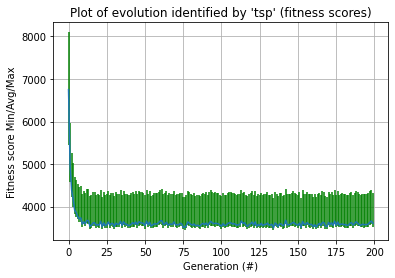

In [19]:
# Generate a graph showing the evolutionary results: fitness vs generations
%run /opt/conda/bin/pyevolve_graph.py -i tsp -2

Pyevolve 0.6 - Graph Plot Tool
By Christian S. Perone

Loading modules....
Loading database and creating graph...
200 generations found !


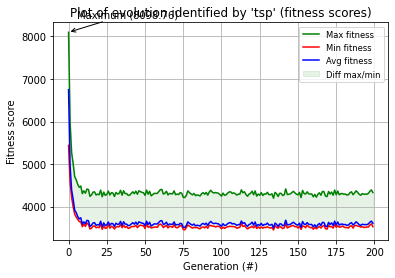

In [20]:
# Generate a heatmap of population fitness score distribution over generations
%run /opt/conda/bin/pyevolve_graph.py -i tsp -4